# Content

[1. Setup](#Setup)

[2. Data Cleaning and Preparation](#Data-Cleaning-&-Preparation)

# Setup & Import¶

In [1]:
#import basic system functions
import os
import datetime
from collections import Counter
import itertools

import random

#import libraries for data wrangling
import pandas as pd
import numpy as np

#import libraries for plotting data
import matplotlib.pyplot as plt
import matplotlib.pyplot as mplt

%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import autocorrelation_plot, lag_plot
from scipy import signal
# If you want a style choose one
#plt.style.use('Solarize_Light2')
#plt.style.use('tableau-colorblind10')
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'



#import libraries for time series analysis
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from pmdarima.arima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.model_selection import TimeSeriesSplit

#import libraries for statistics
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


from IPython.display import Image
from datetime import datetime
import holidays

In [6]:
df_2= pd.read_csv("df_new_2.csv")
df_2_clean= pd.read_csv("data_2_clean.csv")

In [7]:
df_2.drop(columns=['Unnamed: 0'],inplace=True)
df_2_clean.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
#df= pd.read_csv("/Users/brittarover/Capstone/Meteolytics/meteolytix_Artikelgruppen_Umsatz_verschiedeneStandorte.csv")

In [8]:
df_basis_2=df_2.iloc[:,1:13]
df_basis_2_clean=df_2_clean.iloc[:,1:13]

In [9]:
df_2['Datum'] = pd.to_datetime(df_2['Datum'])
df_2_clean['Datum'] = pd.to_datetime(df_2_clean['Datum'])

## Distribution

In [145]:
# Valuation of agg.Values
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weizenbrot,1979.0,63.447962,29.216742,0.0,60.117258,71.638075,81.295926,120.423144
Mischbrot,1979.0,71.860719,20.052765,0.0,60.991450,73.463033,84.206328,152.746146
Vollkornbrot,1979.0,108.283982,26.926271,0.0,95.047923,108.428509,123.201725,225.035588
Stangenbrote,1979.0,39.816439,17.646559,0.0,30.038129,39.332197,49.454939,198.752191
Spezialbrot,1979.0,56.310284,26.874605,0.0,51.758903,61.850288,71.343340,200.259200
Brötchen,1979.0,375.431206,138.927415,0.0,273.886926,355.500769,462.666723,820.516093
Süsse_Brötchen,1979.0,196.670399,57.579214,0.0,161.334074,185.408152,228.537989,428.071519
Herzhafte_Brötchen,1979.0,93.947422,36.940020,0.0,70.681393,87.759013,111.181716,268.706655
KonditoreiBlech,1979.0,98.692646,64.111577,0.0,54.576132,73.102484,150.262028,399.988543
Stückgebäck,1979.0,152.085738,89.090462,0.0,121.227612,145.715536,172.554556,1798.588913


## Correlations

<AxesSubplot:title={'center':'Korrelation nach Pearson für Brötchen'}>

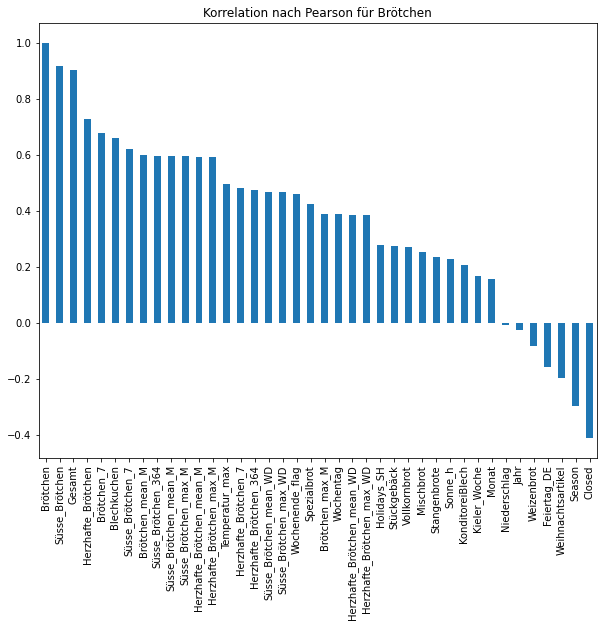

In [146]:
# correlation für Brötchen
basis=num_df.corr(method='pearson')['Brötchen'].sort_values(axis=0, ascending=False)
basis.plot(kind='bar',figsize=(10,8),title='Korrelation nach Pearson für Brötchen')

<function matplotlib.pyplot.show(close=None, block=None)>

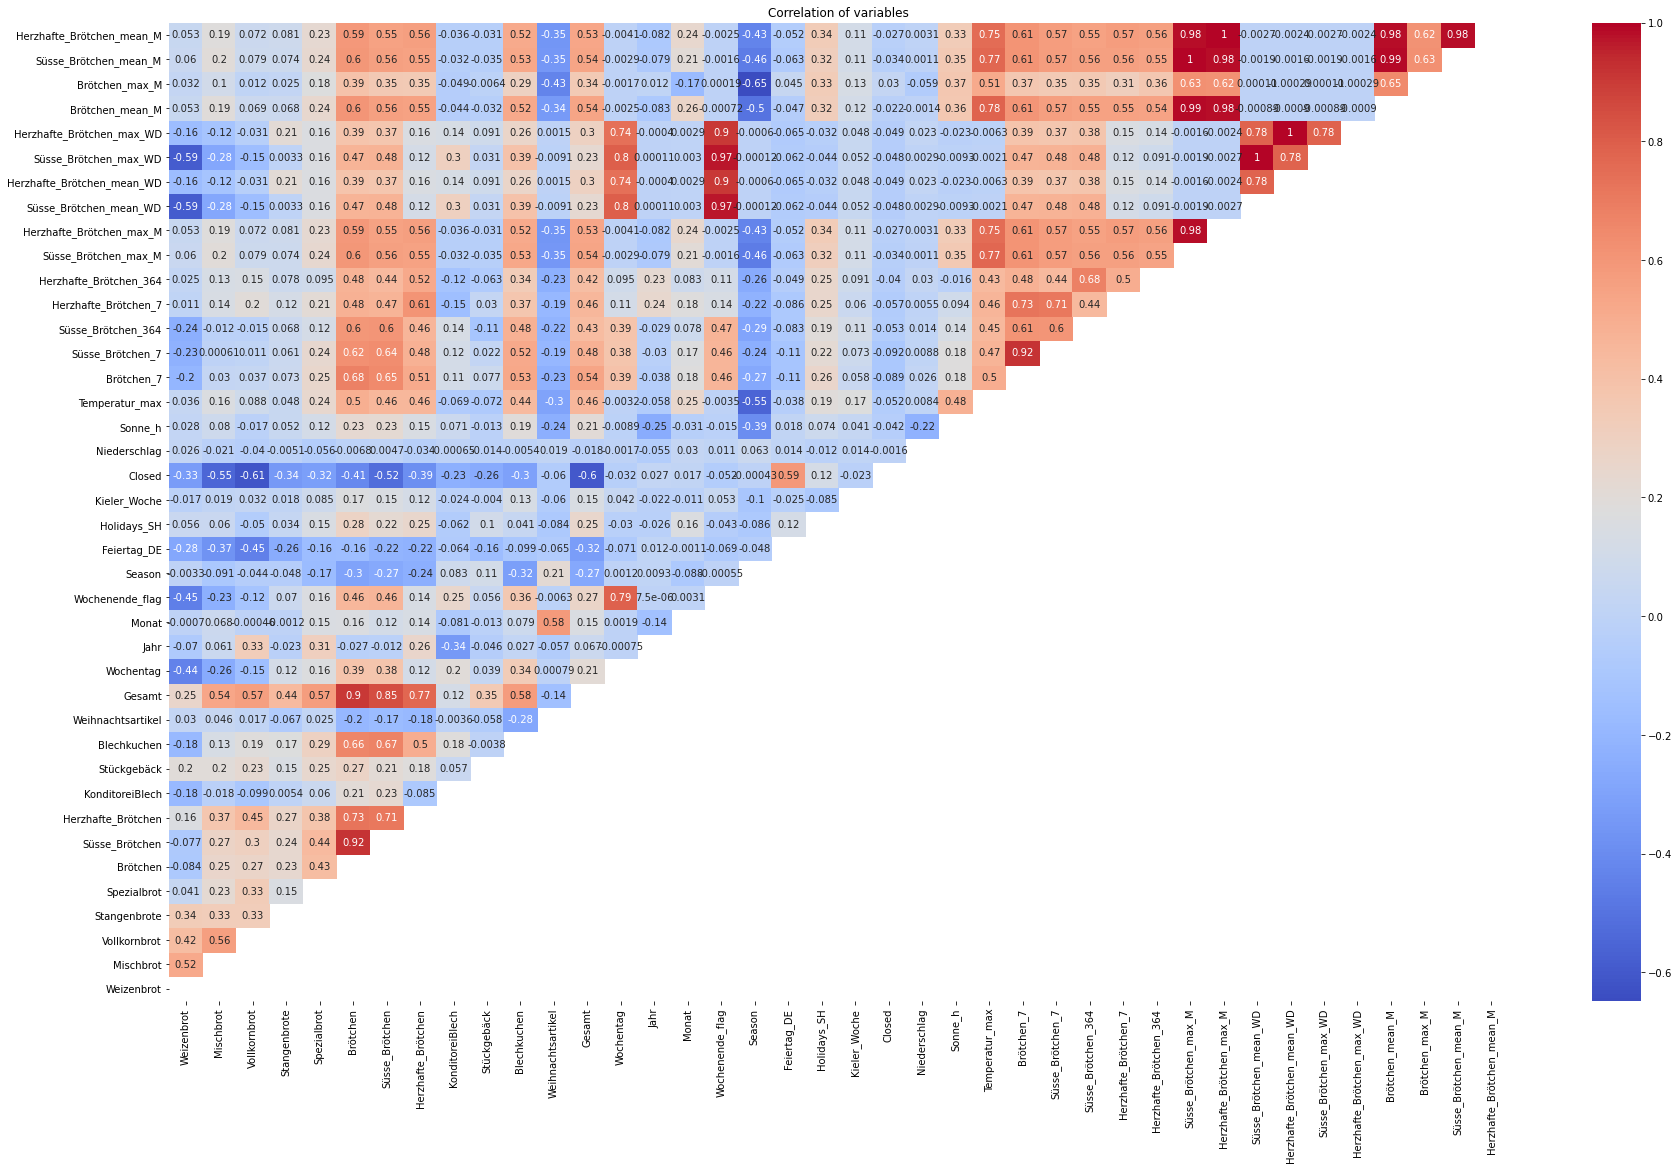

In [34]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

num_df = df_2.select_dtypes(include=numerics)

#Korrelationsanalyse
mask = np.triu( num_df.corr())
plt.figure(figsize=(30,18))
plt.title('Correlation of variables')
ax=sns.heatmap(num_df.corr(),vmax=1.0,annot=True,mask=mask,cmap='coolwarm')
plt.savefig('correlogram_simple.png')
ax.set_ylim((0,40))
plt.show

# Checks Timeseries & Setup Modelling

In [10]:
df_newmodel_2 = df_2.set_index('Datum')

In [11]:
df_newmodel_2_clean = df_2_clean.set_index('Datum')

In [ ]:
#df_new_1_index=df_newmodel_1.set_index('Datum')
#df_new_2_index=df_newmodel_2.set_index('Datum')
#df_new_3_index=df_newmodel_1.set_index('Datum')

## Metrics

**Conclusions**
- `I choose MAE and MAPE as Performance Measures for my project.`

I would analyse the results from the different models via the two different metrics mean absolute error **MAE** which is available via Sklearn.metrics and via the metrics mean absolute percentage error called **MAPE**.

There is no inbuilt function in sci-kit learn, so i define a custom function to calculate this measure. I adjusted the commom measure in the way that i do not consider all closed days of a Filiale.


In [12]:
#calculate mean absolute forecast error which only take actual values unequal to zero in consideration
def mean_absolute_percentage_error_WZ(actual, predicted): 
    
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100


In [13]:
#calculate mean absolute percentage forecast error
def mean_absolute_percentage_error(actual, predicted): 
    
    nz_1=(actual==0)
    actual_nz=actual[nz_1==0]
    
    difference_nz=actual-predicted
    difference_nz.dropna()
    return np.mean(np.abs((difference_nz) / actual_nz)) * 100

In [14]:
from sklearn.metrics import make_scorer
def mae(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    distance_mean = distance.mean()
    score = np.sqrt(distance_mean)
    return score
mae_score = make_scorer(mae, greater_is_better = False)

In [15]:
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE', round(mean_absolute_percentage_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

## Test-/Train-Split

Split into train and test datasets to build the model on the training dataset and forecast using the test dataset. I decide to use the first 4 years for training and the period since 01.01.2019 for testing. 

In [16]:
# use past 4 years data to forecast the next 15 months until corona

start_train='01.01.2016'
end_train = '31.12.2018'
start_test='01.01.2019'

In [17]:
start_short='01.01.2018'
end_short = '31.12.2019'
start_test_short='01.01.2020'

corona='15.03.2020'

In [18]:
# Basismodel
train_basis_2 = df_newmodel_2[:end_train].copy()
test_basis_2 = df_newmodel_2[end_train:corona].copy()
df_basis_2_short=df_newmodel_2[start_short:corona].iloc[:,0:12]

In [19]:
train_2 = df_newmodel_2[start_train:end_train].copy()
test_2 = df_newmodel_2[start_test:corona].copy()

In [20]:
train_short_2 = df_newmodel_2[start_short:end_short]
test_short_2 = df_newmodel_2[start_test_short:corona]

In [21]:
train_short_2_clean = df_newmodel_2_clean[start_short:end_short]
test_short_2_clean = df_newmodel_2_clean[start_test_short:corona]

## Baseline Model

The moving average value can also be used directly to make predictions as a naive model and baseline for further 
on analysis. The fit would has been better if trend and seasonality components of the time series have already been removed or adjusted for.

In [197]:
# moving average smoothing as a forecast model
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [307]:
df_results_Baseline = pd.DataFrame( 
                  columns=['Model', 'Label','MAE_BASELINE'])

In [129]:
df_results_Baseline= pd.read_csv("df_results_Baseline")
df_results_Baseline

,Unnamed: 0,Model,Label,MAE_BASELINE
0,1,BASELINE,Weizenbrot,21.810966
1,2,BASELINE,Mischbrot,14.696344
2,3,BASELINE,Vollkornbrot,17.744443
3,4,BASELINE,Stangenbrote,16.508831
4,5,BASELINE,Spezialbrot,13.188681
5,6,BASELINE,Brötchen,77.563061
6,7,BASELINE,Süsse_Brötchen,32.109803
7,8,BASELINE,Herzhafte_Brötchen,18.289108
8,9,BASELINE,KonditoreiBlech,34.783809
9,10,BASELINE,Stückgebäck,36.841229


# Winters Holt Expontial Smoothing-short Period

In [31]:
df_results_Winters_Holt_OPT = pd.DataFrame( 
                  columns=['Model','Fit', 'Label','MAE','MAPE'])

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [24]:
#For Winters Holt all values have to be strictly positive so I decide to set the 0-values to NaN and 
#use interpolation to fill the missing data


In [25]:
articlelist=train_short_2.iloc[:,0:11].columns.tolist()

In [26]:
for i in articlelist:
    train_short_2[i]=train_short_2[i].apply(lambda x: x if x>0 else None )

    train_short_2[i].fillna(method='ffill',inplace=True)
    train_short_2[i].fillna(method='bfill',inplace=True)

In [106]:
df_results_Winters_Holt_OPT.to_csv("df_results_Winters_Holt_OPT.csv")

## Weizenbrot

In [27]:
fit1 = ExponentialSmoothing(train_short_2.Weizenbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Weizenbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.Weizenbrot, trend='add',damped=False,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)

In [411]:
fit4 = ExponentialSmoothing(train_short_2.Weizenbrot, trend='add',damped=False,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [29]:
article='Weizenbrot'

In [271]:
MAE_1_FIT1 = mean_absolute_error(test_short_2.Weizenbrot,fit1.forecast(75))
MAPE_1_FIT1= mean_absolute_percentage_error(test_short_2.Weizenbrot,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_1_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_1_FIT1}')

Article Weizenbrot FIT1, MAE:20.878688112617212
Article Weizenbrot FIT1, MAPE:18.991319819756587


In [32]:
MAE_1_FIT2 = mean_absolute_error(test_short_2.Weizenbrot,fit2.forecast(75))
MAPE_1_FIT2= mean_absolute_percentage_error(test_short_2.Weizenbrot,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_1_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_1_FIT2}')

df_results_Winters_Holt_OPT.loc['1',:] = ['Winters_Holt','Seas_mult',article,MAE_1_FIT2,MAPE_1_FIT2]

Article Weizenbrot FIT2, MAE:20.194920500809992
Article Weizenbrot FIT2, MAPE:18.06289981741875


In [284]:
MAE_1_FIT3 = mean_absolute_error(test_short_2.Weizenbrot,fit3.forecast(75))
MAPE_1_FIT3= mean_absolute_percentage_error(test_short_2.Weizenbrot,fit3.forecast(75))
#df_results_Prophet_Opt=df_results_Prophet_Opt.append({'Model' : 'Prophet-OPT' , 'Label' : article, 'MAE' : MAE,'MAPE' : MAPE} , ignore_index=True)
print(f'Article {article} FIT3, MAE:{MAE_1_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_1_FIT3}')

Article Weizenbrot FIT3, MAE:20.69392365280232
Article Weizenbrot FIT3, MAPE:18.726045754487497


In [283]:
MAE_1_FIT4 = mean_absolute_error(test_short_2.Weizenbrot,fit4.forecast(75))
MAPE_1_FIT4= mean_absolute_percentage_error(test_short_2.Weizenbrot,fit4.forecast(75))
#df_results_Prophet_Opt=df_results_Prophet_Opt.append({'Model' : 'Prophet-OPT' , 'Label' : article, 'MAE' : MAE,'MAPE' : MAPE} , ignore_index=True)
print(f'Article {article} FIT4, MAE:{MAE_1_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_1_FIT4}')
df_results_Prophet_Winters_Holt.loc['4',:] = ['Winters_Holt','Seas_mult/Trend_dampF',article,
                                               MAE_1_FIT4,MAPE_1_FIT4]


Article Weizenbrot FIT4, MAE:20.614100681894097
Article Weizenbrot FIT4, MAPE:18.598913924385403


## Mischbrot

In [34]:
fit1 = ExponentialSmoothing(train_short_2.Mischbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Mischbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [35]:
fit3 = ExponentialSmoothing(train_short_2.Mischbrot, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.Mischbrot, trend='add',damped=False,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [33]:
article='Mischbrot'

In [290]:
MAE_2_FIT1 = mean_absolute_error(test_short_2.Mischbrot,fit1.forecast(75))
MAPE_2_FIT1= mean_absolute_percentage_error(test_short_2.Mischbrot,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_2_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_2_FIT1}')

Article Mischbrot FIT1, MAE:16.39042634021618
Article Mischbrot FIT1, MAPE:23.20340416084934


In [291]:
MAE_2_FIT2 = mean_absolute_error(test_short_2.Mischbrot,fit2.forecast(75))
MAPE_2_FIT2= mean_absolute_percentage_error(test_short_2.Mischbrot,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_2_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_2_FIT2}')

Article Mischbrot FIT2, MAE:16.39275927862955
Article Mischbrot FIT2, MAPE:23.23635851690697


In [295]:
MAE_2_FIT3 = mean_absolute_error(test_short_2.Mischbrot,fit3.forecast(75))
MAPE_2_FIT3= mean_absolute_percentage_error(test_short_2.Mischbrot,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_2_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_2_FIT3}')

Article Mischbrot FIT3, MAE:16.34777842300484
Article Mischbrot FIT3, MAPE:23.369709575549457


In [36]:
MAE_2_FIT4 = mean_absolute_error(test_short_2.Mischbrot,fit4.forecast(75))
MAPE_2_FIT4= mean_absolute_percentage_error(test_short_2.Mischbrot,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_2_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_2_FIT4}')
df_results_Winters_Holt_OPT.loc['2',:] = ['Winters_Holt','Seas_mult/Trend_dampF',article,
                                               MAE_2_FIT4,MAPE_2_FIT4]

Article Mischbrot FIT4, MAE:17.199703974639622
Article Mischbrot FIT4, MAPE:23.12950411370845


## Vollkornbrot

In [37]:
fit1 = ExponentialSmoothing(train_short_2.Vollkornbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Vollkornbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.Vollkornbrot, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.Vollkornbrot, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [38]:
article='Vollkornbrot'
MAE_3_FIT1 = mean_absolute_error(test_short_2.Vollkornbrot,fit1.forecast(75))
MAPE_3_FIT1= mean_absolute_percentage_error(test_short_2.Vollkornbrot,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_3_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_3_FIT1}')

df_results_Winters_Holt_OPT.loc['3',:] = ['Winters_Holt','Seas_add',article,MAE_3_FIT1,MAPE_3_FIT1]


Article Vollkornbrot FIT1, MAE:21.973916065965398
Article Vollkornbrot FIT1, MAPE:16.727852410250655


In [254]:
article='Vollkornbrot'
MAE_3_FIT2 = mean_absolute_error(test_short_2.Vollkornbrot,fit2.forecast(75))
MAPE_3_FIT2= mean_absolute_percentage_error(test_short_2.Vollkornbrot,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_3_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_3_FIT2}')

Article Vollkornbrot FIT2, MAE:22.380064353046066
Article Vollkornbrot FIT2, MAPE:17.15132170084414


In [255]:
article='Vollkornbrot'
MAE_3_FIT3 = mean_absolute_error(test_short_2.Vollkornbrot,fit3.forecast(75))
MAPE_3_FIT3= mean_absolute_percentage_error(test_short_2.Vollkornbrot,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_3_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_3_FIT3}')

Article Vollkornbrot FIT3, MAE:21.851657027438968
Article Vollkornbrot FIT3, MAPE:16.939464873867255


In [256]:
article='Vollkornbrot'
MAE_3_FIT4 = mean_absolute_error(test_short_2.Vollkornbrot,fit4.forecast(75))
MAPE_3_FIT4= mean_absolute_percentage_error(test_short_2.Vollkornbrot,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_3_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_3_FIT4}')

Article Vollkornbrot FIT4, MAE:22.28640606796929
Article Vollkornbrot FIT4, MAPE:16.987065913740405


## Spezialbrot

In [39]:
article='Spezialbrot'

In [40]:
fit1 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [41]:
fit3 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [301]:
MAE_4_FIT1 = mean_absolute_error(test_short_2[article],fit1.forecast(75))
MAPE_4_FIT1= mean_absolute_percentage_error(test_short_2[article],fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_4_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_4_FIT1}')

Article Spezialbrot FIT1, MAE:11.115681266847174
Article Spezialbrot FIT1, MAPE:15.44578497695416


In [302]:
MAE_4_FIT2 = mean_absolute_error(test_short_2[article],fit2.forecast(75))
MAPE_4_FIT2= mean_absolute_percentage_error(test_short_2[article],fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_4_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_4_FIT2}')

Article Spezialbrot FIT2, MAE:11.10858078511261
Article Spezialbrot FIT2, MAPE:15.437774067445414


In [42]:
MAE_4_FIT3 = mean_absolute_error(test_short_2[article],fit3.forecast(75))
MAPE_4_FIT3= mean_absolute_percentage_error(test_short_2[article],fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_4_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_4_FIT3}')

df_results_Winters_Holt_OPT.loc['4',:] = ['Winters_Holt','Seas_add/Trend_damp',article,MAE_4_FIT3,MAPE_4_FIT3]


Article Spezialbrot FIT3, MAE:11.203307147670893
Article Spezialbrot FIT3, MAPE:15.361159697394333


In [310]:
MAE_4_FIT4 = mean_absolute_error(test_short_2[article],fit4.forecast(75))
MAPE_4_FIT4= mean_absolute_percentage_error(test_short_2[article],fit4.forecast(75))
#df_results_Prophet_Opt=df_results_Prophet_Opt.append({'Model' : 'Prophet-OPT' , 'Label' : article, 'MAE' : MAE,'MAPE' : MAPE} , ignore_index=True)
print(f'Article {article} FIT4, MAE:{MAE_4_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_4_FIT4}')
df_results_Prophet_Winters_Holt.loc['16',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,
                                               MAE_4_FIT4,MAPE_4_FIT4]

Article Spezialbrot FIT4, MAE:11.195197150916865
Article Spezialbrot FIT4, MAPE:15.375044122384166


## Stangenbrote

In [43]:
article='Stangenbrote'

In [315]:
fit1 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [44]:
fit3 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [317]:
MAE_5_FIT1 = mean_absolute_error(test_short_2[article],fit1.forecast(75))
MAPE_5_FIT1= mean_absolute_percentage_error(test_short_2[article],fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_5_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_5_FIT1}')

Article Stangenbrote FIT1, MAE:14.471898211294244
Article Stangenbrote FIT1, MAPE:40.45194693780696


In [318]:
MAE_5_FIT2 = mean_absolute_error(test_short_2[article],fit2.forecast(75))
MAPE_5_FIT2= mean_absolute_percentage_error(test_short_2[article],fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_5_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_5_FIT2}')

Article Stangenbrote FIT2, MAE:17.104221446152774
Article Stangenbrote FIT2, MAPE:52.50654551976734


In [325]:
MAE_5_FIT3 = mean_absolute_error(test_short_2[article],fit3.forecast(75))
MAPE_5_FIT3= mean_absolute_percentage_error(test_short_2[article],fit3.forecast(75))

print(f'Article {article} FIT3, MAE:{MAE_5_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_5_FIT3}')

Article Stangenbrote FIT3, MAE:13.852679695979617
Article Stangenbrote FIT3, MAPE:43.3186281846247


In [45]:
MAE_5_FIT4 = mean_absolute_error(test_short_2[article],fit4.forecast(75))
MAPE_5_FIT4= mean_absolute_percentage_error(test_short_2[article],fit4.forecast(75))

print(f'Article {article} FIT4, MAE:{MAE_5_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_5_FIT4}')

df_results_Winters_Holt_OPT.loc['5',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,
                                               MAE_5_FIT4,MAPE_5_FIT4]


Article Stangenbrote FIT4, MAE:13.725387248414506
Article Stangenbrote FIT4, MAPE:38.97711072897021


## Brötchen

In [46]:
fit1 = ExponentialSmoothing(train_short_2.Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.Brötchen, seasonal_periods=365,trend='add',damped=False, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.Brötchen, seasonal_periods=365,trend='add',damped=False, seasonal='mul').fit(use_boxcox=True)

In [351]:
#fit1.fittedvalues.plot(style='--', color='red')
#fit2.fittedvalues.plot(style='--', color='green')

#fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
#fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

#plt.show()
#print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

In [47]:
article='Brötchen'
MAE_6_FIT1 = mean_absolute_error(test_short_2.Brötchen,fit1.forecast(75))
MAPE_6_FIT1= mean_absolute_percentage_error(test_short_2.Brötchen,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_6_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_6_FIT1}')
df_results_Winters_Holt_OPT.loc['6',:] = ['Winters_Holt','Seas_add','Brötchen',
                                               MAE_6_FIT1,MAPE_6_FIT1]

Article Brötchen FIT1, MAE:87.61023077580506
Article Brötchen FIT1, MAPE:26.06264882808942


In [198]:
article='Brötchen'
MAE_6_FIT2 = mean_absolute_error(test_short_2.Brötchen,fit2.forecast(75))
MAPE_6_FIT2= mean_absolute_percentage_error(test_short_2.Brötchen,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_6_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_6_FIT2}')

Article Brötchen FIT2, MAE:86.67432133015389
Article Brötchen FIT2, MAPE:25.61599237420222


In [336]:
article='Brötchen'
MAE_6_FIT3 = mean_absolute_error(test_short_2.Brötchen,fit3.forecast(75))
MAPE_6_FIT3= mean_absolute_percentage_error(test_short_2.Brötchen,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_6_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_6_FIT3}')

Article Brötchen FIT3, MAE:86.7023071671584
Article Brötchen FIT3, MAPE:25.94620784980825


In [337]:
article='Brötchen'
MAE_6_FIT4 = mean_absolute_error(test_short_2.Brötchen,fit4.forecast(75))
MAPE_6_FIT4= mean_absolute_percentage_error(test_short_2.Brötchen,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_6_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_6_FIT4}')

Article Brötchen FIT4, MAE:86.904749185034
Article Brötchen FIT4, MAPE:25.96423400502475


## Süsse Brötchen

In [48]:
fit1 = ExponentialSmoothing(train_short_2.Süsse_Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Süsse_Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.Süsse_Brötchen,trend='add',damped=True, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.Süsse_Brötchen,trend='add',damped=True, seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [208]:
article='Süsse_Brötchen'
MAE_7_FIT1 = mean_absolute_error(test_short_2.Süsse_Brötchen,fit1.forecast(75))
MAPE_7_FIT1= mean_absolute_percentage_error(test_short_2.Süsse_Brötchen,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_7_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_7_FIT1}')

Article Süsse_Brötchen FIT1, MAE:48.03039285748446
Article Süsse_Brötchen FIT1, MAPE:23.073277415820954


In [209]:
article='Süsse_Brötchen'
MAE_7_FIT2 = mean_absolute_error(test_short_2.Süsse_Brötchen,fit2.forecast(75))
MAPE_7_FIT2= mean_absolute_percentage_error(test_short_2.Süsse_Brötchen,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_7_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_7_FIT2}')

Article Süsse_Brötchen FIT2, MAE:40.79222261854292
Article Süsse_Brötchen FIT2, MAPE:21.35539637431054


In [346]:
article='Süsse_Brötchen'
MAE_7_FIT3 = mean_absolute_error(test_short_2.Süsse_Brötchen,fit3.forecast(75))
MAPE_7_FIT3= mean_absolute_percentage_error(test_short_2.Süsse_Brötchen,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_7_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_7_FIT3}')

Article Süsse_Brötchen FIT3, MAE:38.23940347223121
Article Süsse_Brötchen FIT3, MAPE:19.025496252622226


In [49]:
article='Süsse_Brötchen'
MAE_7_FIT4 = mean_absolute_error(test_short_2.Süsse_Brötchen,fit4.forecast(75))
MAPE_7_FIT4= mean_absolute_percentage_error(test_short_2.Süsse_Brötchen,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_7_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_7_FIT4}')
df_results_Winters_Holt_OPT.loc['7',:] = ['Winters_Holt','Seas_mult/Trend_damp','Süsse_Brötchen',
                                               MAE_7_FIT4,MAPE_7_FIT4]

Article Süsse_Brötchen FIT4, MAE:38.22934297818093
Article Süsse_Brötchen FIT4, MAPE:19.01860321706809


## Herzhafte Brötchen

In [50]:
fit1 = ExponentialSmoothing(train_short_2.Herzhafte_Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.Herzhafte_Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.Herzhafte_Brötchen, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.Herzhafte_Brötchen, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [215]:
article='Herzhafte_Brötchen'
MAE_8_FIT1 = mean_absolute_error(test_short_2.Herzhafte_Brötchen,fit1.forecast(75))
MAPE_8_FIT1= mean_absolute_percentage_error(test_short_2.Herzhafte_Brötchen,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_8_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_8_FIT1}')

Article Herzhafte_Brötchen FIT1, MAE:19.723671734105334
Article Herzhafte_Brötchen FIT1, MAPE:24.930660559915594


In [216]:
article='Herzhafte_Brötchen'
MAE_8_FIT2 = mean_absolute_error(test_short_2.Herzhafte_Brötchen,fit2.forecast(75))
MAPE_8_FIT2= mean_absolute_percentage_error(test_short_2.Herzhafte_Brötchen,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_8_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_8_FIT2}')

Article Herzhafte_Brötchen FIT2, MAE:19.794664478524428
Article Herzhafte_Brötchen FIT2, MAPE:24.982263548416675


In [221]:
article='Herzhafte_Brötchen'
MAE_8_FIT3 = mean_absolute_error(test_short_2.Herzhafte_Brötchen,fit3.forecast(75))
MAPE_8_FIT3= mean_absolute_percentage_error(test_short_2.Herzhafte_Brötchen,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_8_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_8_FIT3}')

Article Herzhafte_Brötchen FIT3, MAE:19.812558188945324
Article Herzhafte_Brötchen FIT3, MAPE:25.206787311948492


In [51]:
article='Herzhafte_Brötchen'
MAE_8_FIT4 = mean_absolute_error(test_short_2.Herzhafte_Brötchen,fit4.forecast(75))
MAPE_8_FIT4= mean_absolute_percentage_error(test_short_2.Herzhafte_Brötchen,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_8_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_8_FIT4}')
df_results_Winters_Holt_OPT.loc['8',:] = ['Winters_Holt','Seas_mult/Trend_damp','Herzhafte_Brötchen',
                                               MAE_8_FIT4,MAPE_8_FIT4]

Article Herzhafte_Brötchen FIT4, MAE:19.69578533996954
Article Herzhafte_Brötchen FIT4, MAPE:24.797427934740586


## KonditoreiBlech

In [52]:
fit1 = ExponentialSmoothing(train_short_2.KonditoreiBlech, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2.KonditoreiBlech, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_short_2.KonditoreiBlech, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2.KonditoreiBlech, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [235]:
article='KonditoreiBlech'

In [53]:
MAE_9_FIT1 = mean_absolute_error(test_short_2.KonditoreiBlech,fit1.forecast(75))
MAPE_9_FIT1= mean_absolute_percentage_error(test_short_2.KonditoreiBlech,fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_9_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_9_FIT1}')
df_results_Winters_Holt_OPT.loc['9',:] = ['Winters_Holt','Seas_add','KonditoreiBlech',
                                               MAE_9_FIT1,MAPE_9_FIT1]

Article Herzhafte_Brötchen FIT1, MAE:28.026943710590494
Article Herzhafte_Brötchen FIT1, MAPE:31.7257535020956


In [237]:
MAE_9_FIT2 = mean_absolute_error(test_short_2.KonditoreiBlech,fit2.forecast(75))
MAPE_9_FIT2= mean_absolute_percentage_error(test_short_2.KonditoreiBlech,fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_9_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_9_FIT2}')

Article KonditoreiBlech FIT2, MAE:29.242160202222312
Article KonditoreiBlech FIT2, MAPE:34.27948191939469


In [238]:
MAE_9_FIT3 = mean_absolute_error(test_short_2.KonditoreiBlech,fit3.forecast(75))
MAPE_9_FIT3= mean_absolute_percentage_error(test_short_2.KonditoreiBlech,fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_9_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_9_FIT3}')

Article KonditoreiBlech FIT3, MAE:28.318437036556496
Article KonditoreiBlech FIT3, MAPE:32.63234448602855


In [239]:
MAE_9_FIT4 = mean_absolute_error(test_short_2.KonditoreiBlech,fit4.forecast(75))
MAPE_9_FIT4= mean_absolute_percentage_error(test_short_2.KonditoreiBlech,fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_9_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_9_FIT4}')

Article KonditoreiBlech FIT4, MAE:29.56181233444167
Article KonditoreiBlech FIT4, MAPE:35.04192564173172


## Stückgebäck

In [54]:
article='Stückgebäck'

In [358]:
fit1 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [55]:
fit3 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [360]:
MAE_10_FIT1 = mean_absolute_error(test_short_2[article],fit1.forecast(75))
MAPE_10_FIT1= mean_absolute_percentage_error(test_short_2[article],fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_10_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_10_FIT1}')


Article Stückgebäck FIT1, MAE:50.95364064758407
Article Stückgebäck FIT1, MAPE:37.95344809290997


In [361]:
MAE_10_FIT2 = mean_absolute_error(test_short_2[article],fit2.forecast(75))
MAPE_10_FIT2= mean_absolute_percentage_error(test_short_2[article],fit2.forecast(75))

print(f'Article {article} FIT2, MAE:{MAE_10_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_10_FIT2}')


Article Stückgebäck FIT2, MAE:51.40603285754276
Article Stückgebäck FIT2, MAPE:38.250780694687506


In [56]:
MAE_10_FIT3 = mean_absolute_error(test_short_2[article],fit3.forecast(75))
MAPE_10_FIT3= mean_absolute_percentage_error(test_short_2[article],fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_10_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_10_FIT3}')

df_results_Winters_Holt_OPT.loc['10',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,
                                               MAE_10_FIT3,MAPE_10_FIT3]


Article Stückgebäck FIT3, MAE:44.12044451225513
Article Stückgebäck FIT3, MAPE:29.72755451411623


In [371]:
MAE_10_FIT4 = mean_absolute_error(test_short_2[article],fit4.forecast(75))
MAPE_10_FIT4= mean_absolute_percentage_error(test_short_2[article],fit4.forecast(75))

print(f'Article {article} FIT4, MAE:{MAE_10_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_10_FIT4}')

#df_results_Prophet_Winters_Holt_OPT.loc['5',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,
                                              # MAE_5_FIT4,MAPE_5_FIT4]


Article Stückgebäck FIT4, MAE:44.42605101956507
Article Stückgebäck FIT4, MAPE:29.793781238119855


## Blechkuchen

In [58]:
article='Blechkuchen'

In [59]:
fit1 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_short_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [382]:
fit3 = ExponentialSmoothing(train_short_2[article], trend='add',damped=False,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_short_2[article], trend='add',damped=False,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [378]:
MAE_11_FIT1 = mean_absolute_error(test_short_2[article],fit1.forecast(75))
MAPE_11_FIT1= mean_absolute_percentage_error(test_short_2[article],fit1.forecast(75))
print(f'Article {article} FIT1, MAE:{MAE_11_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_11_FIT1}')

Article Blechkuchen FIT1, MAE:30.86429337400019
Article Blechkuchen FIT1, MAPE:39.36827984958145


In [60]:
MAE_11_FIT2 = mean_absolute_error(test_short_2[article],fit2.forecast(75))
MAPE_11_FIT2= mean_absolute_percentage_error(test_short_2[article],fit2.forecast(75))
print(f'Article {article} FIT2, MAE:{MAE_11_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_11_FIT2}')
df_results_Winters_Holt_OPT.loc['11',:] = ['Winters_Holt','Seas_mult',article,
                                              MAE_11_FIT2,MAPE_11_FIT2]


Article Blechkuchen FIT2, MAE:30.226688088493756
Article Blechkuchen FIT2, MAPE:38.22937007318673


In [383]:
MAE_11_FIT3 = mean_absolute_error(test_short_2[article],fit3.forecast(75))
MAPE_11_FIT3= mean_absolute_percentage_error(test_short_2[article],fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_11_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_11_FIT3}')

Article Blechkuchen FIT3, MAE:31.14545178473422
Article Blechkuchen FIT3, MAPE:39.09636377000933


In [386]:
MAE_11_FIT4 = mean_absolute_error(test_short_2[article],fit4.forecast(75))
MAPE_11_FIT4= mean_absolute_percentage_error(test_short_2[article],fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_5_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_5_FIT4}')

#df_results_Prophet_Winters_Holt.loc['20',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,
                                              # MAE_5_FIT4,MAPE_5_FIT4]


Article Blechkuchen FIT4, MAE:13.997588634260756
Article Blechkuchen FIT4, MAPE:38.69908469905434


# Winters Holt Expontial Smoothing-long Period

In [ ]:
#For Winters Holt all values have to be strictly positive so I decide to set the 0-values to NaN and 
#use interpolation to fill the missing data


In [61]:
for i in articlelist:
    train_2[i]=train_2[i].apply(lambda x: x if x>0 else None )

    train_2[i].fillna(method='ffill',inplace=True)
    train_2[i].fillna(method='bfill',inplace=True)

## Weizenbrot

In [62]:
fit1 = ExponentialSmoothing(train_2.Weizenbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Weizenbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_2.Weizenbrot, trend='add',damped=False,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)

In [65]:
fit4 = ExponentialSmoothing(train_2.Weizenbrot, trend='add',damped=False,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [63]:
article='Weizenbrot'

In [422]:
MAE_1_FIT1 = mean_absolute_error(test_2.Weizenbrot,fit1.forecast(440))
MAPE_1_FIT1= mean_absolute_percentage_error(test_2.Weizenbrot,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_1_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_1_FIT1}')

Article Weizenbrot FIT1, MAE:19.84966119230079
Article Weizenbrot FIT1, MAPE:15.271958644295601


In [423]:
MAE_1_FIT2 = mean_absolute_error(test_2.Weizenbrot,fit2.forecast(440))
MAPE_1_FIT2= mean_absolute_percentage_error(test_2.Weizenbrot,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_1_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_1_FIT2}')

#df_results_Winters_Holt_OPT.loc['1',:] = ['Winters_Holt','Seas_mult',article,MAE_1_FIT2,MAPE_1_FIT2]

Article Weizenbrot FIT2, MAE:19.841415470772798
Article Weizenbrot FIT2, MAPE:15.260016655197456


In [424]:
MAE_1_FIT3 = mean_absolute_error(test_2.Weizenbrot,fit3.forecast(440))
MAPE_1_FIT3= mean_absolute_percentage_error(test_2.Weizenbrot,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_1_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_1_FIT3}')

Article Weizenbrot FIT3, MAE:21.520728700891826
Article Weizenbrot FIT3, MAPE:17.59846887393582


In [66]:
MAE_1_FIT4 = mean_absolute_error(test_2.Weizenbrot,fit4.forecast(440))
MAPE_1_FIT4= mean_absolute_percentage_error(test_2.Weizenbrot,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_1_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_1_FIT4}')
df_results_Winters_Holt_OPT.loc['13',:] = ['Winters_Holt_long','Seas_mult/Trend_damp',article,MAE_1_FIT2,MAPE_1_FIT2]

Article Weizenbrot FIT4, MAE:20.36369280249813
Article Weizenbrot FIT4, MAPE:16.208129186272757


## Mischbrot

In [97]:
fit1 = ExponentialSmoothing(train_2.Mischbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Mischbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [98]:
fit3 = ExponentialSmoothing(train_2.Mischbrot, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.Mischbrot, trend='add',damped=False,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [99]:
article='Mischbrot'

In [430]:
MAE_2_FIT1 = mean_absolute_error(test_2.Mischbrot,fit1.forecast(440))
MAPE_2_FIT1= mean_absolute_percentage_error(test_2.Mischbrot,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_2_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_2_FIT1}')

Article Mischbrot FIT1, MAE:15.940281380615907
Article Mischbrot FIT1, MAPE:21.048830197104987


In [431]:
MAE_2_FIT2 = mean_absolute_error(test_2.Mischbrot,fit2.forecast(440))
MAPE_2_FIT2= mean_absolute_percentage_error(test_2.Mischbrot,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_2_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_2_FIT2}')

Article Mischbrot FIT2, MAE:15.940737512726317
Article Mischbrot FIT2, MAPE:21.04940721711307


In [ ]:
MAE_2_FIT3 = mean_absolute_error(test_2.Mischbrot,fit3.forecast(440))
MAPE_2_FIT3= mean_absolute_percentage_error(test_2.Mischbrot,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_2_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_2_FIT3}')

In [100]:
MAE_2_FIT4 = mean_absolute_error(test_2.Mischbrot,fit4.forecast(440))
MAPE_2_FIT4= mean_absolute_percentage_error(test_2.Mischbrot,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_2_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_2_FIT4}')
df_results_Winters_Holt_OPT.loc['14',:] = ['Winters_Holt_long','Seas_mult/Trend_dampF',article,
                                               MAE_2_FIT4,MAPE_2_FIT4]

Article Mischbrot FIT4, MAE:17.466538972772458
Article Mischbrot FIT4, MAPE:22.675451802139992


## Vollkornbrot

In [70]:
fit1 = ExponentialSmoothing(train_2.Vollkornbrot, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Vollkornbrot, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_2.Vollkornbrot, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.Vollkornbrot, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [450]:
article='Vollkornbrot'
MAE_3_FIT1 = mean_absolute_error(test_2.Vollkornbrot,fit1.forecast(440))
MAPE_3_FIT1= mean_absolute_percentage_error(test_2.Vollkornbrot,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_3_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_3_FIT1}')

#df_results_Winters_Holt_OPT.loc['3',:] = ['Winters_Holt','Seas_add',article,MAE_3_FIT1,MAPE_3_FIT1]


Article Vollkornbrot FIT1, MAE:21.70670508338372
Article Vollkornbrot FIT1, MAPE:15.43826646398127


In [453]:
article='Vollkornbrot'
MAE_3_FIT2 = mean_absolute_error(test_2.Vollkornbrot,fit2.forecast(440))
MAPE_3_FIT2= mean_absolute_percentage_error(test_2.Vollkornbrot,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_3_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_3_FIT2}')

Article Vollkornbrot FIT2, MAE:21.69109751034073
Article Vollkornbrot FIT2, MAPE:15.440658857646053


In [454]:
article='Vollkornbrot'
MAE_3_FIT3 = mean_absolute_error(test_2.Vollkornbrot,fit3.forecast(440))
MAPE_3_FIT3= mean_absolute_percentage_error(test_2.Vollkornbrot,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_3_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_3_FIT3}')

Article Vollkornbrot FIT3, MAE:21.754774787401473
Article Vollkornbrot FIT3, MAPE:15.464356741877777


In [71]:
article='Vollkornbrot'
MAE_3_FIT4 = mean_absolute_error(test_2.Vollkornbrot,fit4.forecast(440))
MAPE_3_FIT4= mean_absolute_percentage_error(test_2.Vollkornbrot,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_3_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_3_FIT4}')
df_results_Winters_Holt_OPT.loc['15',:] = ['Winters_Holt_long','Seas_add',article,MAE_3_FIT4,MAPE_3_FIT4]


Article Vollkornbrot FIT4, MAE:22.86968876764619
Article Vollkornbrot FIT4, MAPE:16.91016162076334


## Spezialbrot

In [72]:
article='Spezialbrot'

In [73]:
fit1 = ExponentialSmoothing(train_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [74]:
fit3 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [470]:
MAE_4_FIT1 = mean_absolute_error(test_2[article],fit1.forecast(440))
MAPE_4_FIT1= mean_absolute_percentage_error(test_2[article],fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_4_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_4_FIT1}')

Article Spezialbrot FIT1, MAE:13.76109815375457
Article Spezialbrot FIT1, MAPE:21.001322412729028


In [471]:
MAE_4_FIT2 = mean_absolute_error(test_2[article],fit2.forecast(440))
MAPE_4_FIT2= mean_absolute_percentage_error(test_2[article],fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_4_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_4_FIT2}')

Article Spezialbrot FIT2, MAE:13.638044459577698
Article Spezialbrot FIT2, MAPE:20.762093469278316


In [472]:
MAE_4_FIT3 = mean_absolute_error(test_2[article],fit3.forecast(440))
MAPE_4_FIT3= mean_absolute_percentage_error(test_2[article],fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_4_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_4_FIT3}')

                                          MAE_4_FIT3,MAPE_4_FIT3]


Article Spezialbrot FIT3, MAE:13.299267827989297
Article Spezialbrot FIT3, MAPE:20.080387196504116


In [75]:
MAE_4_FIT4 = mean_absolute_error(test_2[article],fit4.forecast(440))
MAPE_4_FIT4= mean_absolute_percentage_error(test_2[article],fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_4_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_4_FIT4}')

df_results_Winters_Holt_OPT.loc['16',:] = ['Winters_Holt_long','Seas_add/Trend_damp',article,
                                          MAE_4_FIT4,MAPE_4_FIT4]


Article Spezialbrot FIT4, MAE:12.722809384535744
Article Spezialbrot FIT4, MAPE:16.877337251941622


## Stangenbrote

In [76]:
article='Stangenbrote'

In [77]:
fit1 = ExponentialSmoothing(train_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [477]:
fit3 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [78]:
MAE_5_FIT1 = mean_absolute_error(test_2[article],fit1.forecast(440))
MAPE_5_FIT1= mean_absolute_percentage_error(test_2[article],fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_5_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_5_FIT1}')
df_results_Winters_Holt_OPT.loc['17',:] = ['Winters_Holt_long','Seas_add',article,
                                           MAE_5_FIT1,MAPE_5_FIT1] 

Article Stangenbrote FIT1, MAE:15.40440852039632
Article Stangenbrote FIT1, MAPE:45.59976807385882


In [479]:
MAE_5_FIT2 = mean_absolute_error(test_2[article],fit2.forecast(440))
MAPE_5_FIT2= mean_absolute_percentage_error(test_2[article],fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_5_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_5_FIT2}')

Article Stangenbrote FIT2, MAE:14.069007014609992
Article Stangenbrote FIT2, MAPE:52.50654551976734


In [480]:
MAE_5_FIT3 = mean_absolute_error(test_2[article],fit3.forecast(440))
MAPE_5_FIT3= mean_absolute_percentage_error(test_2[article],fit3.forecast(440))

print(f'Article {article} FIT3, MAE:{MAE_5_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_5_FIT3}')

Article Stangenbrote FIT3, MAE:14.553191543912764
Article Stangenbrote FIT3, MAPE:37.05584202969456


In [482]:
MAE_5_FIT4 = mean_absolute_error(test_2[article],fit4.forecast(440))
MAPE_5_FIT4= mean_absolute_percentage_error(test_2[article],fit4.forecast(440))

print(f'Article {article} FIT4, MAE:{MAE_5_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_5_FIT4}')
                                           MAE_5_FIT4,MAPE_5_FIT4]


Article Stangenbrote FIT4, MAE:15.49170033383728
Article Stangenbrote FIT4, MAPE:49.77095493092406


## Brötchen

In [101]:
fit1 = ExponentialSmoothing(train_2.Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_2.Brötchen, seasonal_periods=365,trend='add',damped=True, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.Brötchen, seasonal_periods=365,trend='add',damped=True, seasonal='mul').fit(use_boxcox=True)

In [351]:
#fit1.fittedvalues.plot(style='--', color='red')
#fit2.fittedvalues.plot(style='--', color='green')

#fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
#fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

#plt.show()
#print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

In [80]:
article='Brötchen'
MAE_6_FIT1 = mean_absolute_error(test_2.Brötchen,fit1.forecast(440))
MAPE_6_FIT1= mean_absolute_percentage_error(test_2.Brötchen,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_6_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_6_FIT1}')


Article Brötchen FIT1, MAE:98.92113185528626
Article Brötchen FIT1, MAPE:22.693085061175566


In [486]:
article='Brötchen'
MAE_6_FIT2 = mean_absolute_error(test_2.Brötchen,fit2.forecast(440))
MAPE_6_FIT2= mean_absolute_percentage_error(test_2.Brötchen,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_6_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_6_FIT2}')

Article Brötchen FIT2, MAE:113.99804529671032
Article Brötchen FIT2, MAPE:33.10648140811649


In [102]:
article='Brötchen'
MAE_6_FIT3 = mean_absolute_error(test_2.Brötchen,fit3.forecast(440))
MAPE_6_FIT3= mean_absolute_percentage_error(test_2.Brötchen,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_6_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_6_FIT3}')
df_results_Winters_Holt_OPT.loc['18',:] = ['Winters_Holt_long','Seas_add/Trend_damp','Brötchen',MAE_6_FIT3,MAPE_6_FIT3]

Article Brötchen FIT3, MAE:98.65583065079657
Article Brötchen FIT3, MAPE:22.341864378395456


In [491]:
article='Brötchen'
MAE_6_FIT4 = mean_absolute_error(test_2.Brötchen,fit4.forecast(440))
MAPE_6_FIT4= mean_absolute_percentage_error(test_2.Brötchen,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_6_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_6_FIT4}')

Article Brötchen FIT4, MAE:105.80247510138251
Article Brötchen FIT4, MAPE:29.767038706067822


## Süsse Brötchen

In [103]:
fit1 = ExponentialSmoothing(train_2.Süsse_Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Süsse_Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_2.Süsse_Brötchen,trend='add',damped=True, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.Süsse_Brötchen,trend='add',damped=True, seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [494]:
article='Süsse_Brötchen'
MAE_7_FIT1 = mean_absolute_error(test_2.Süsse_Brötchen,fit1.forecast(440))
MAPE_7_FIT1= mean_absolute_percentage_error(test_2.Süsse_Brötchen,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_7_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_7_FIT1}')

Article Süsse_Brötchen FIT1, MAE:51.49299145057905
Article Süsse_Brötchen FIT1, MAPE:24.17591903818851


In [495]:
article='Süsse_Brötchen'
MAE_7_FIT2 = mean_absolute_error(test_2.Süsse_Brötchen,fit2.forecast(440))
MAPE_7_FIT2= mean_absolute_percentage_error(test_2.Süsse_Brötchen,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_7_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_7_FIT2}')

Article Süsse_Brötchen FIT2, MAE:45.10862836953854
Article Süsse_Brötchen FIT2, MAPE:19.433757859798607


In [496]:
article='Süsse_Brötchen'
MAE_7_FIT3 = mean_absolute_error(test_2.Süsse_Brötchen,fit3.forecast(440))
MAPE_7_FIT3= mean_absolute_percentage_error(test_2.Süsse_Brötchen,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_7_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_7_FIT3}')

Article Süsse_Brötchen FIT3, MAE:44.99204148997669
Article Süsse_Brötchen FIT3, MAPE:18.99441385745107


In [104]:
article='Süsse_Brötchen'
MAE_7_FIT4 = mean_absolute_error(test_2.Süsse_Brötchen,fit4.forecast(440))
MAPE_7_FIT4= mean_absolute_percentage_error(test_2.Süsse_Brötchen,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_7_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_7_FIT4}')
df_results_Winters_Holt_OPT.loc['19',:] = ['Winters_Holt_long','Seas_mult/Trend_damp','Süsse_Brötchen',
                                           MAE_7_FIT4,MAPE_7_FIT4]

Article Süsse_Brötchen FIT4, MAE:39.96401523804059
Article Süsse_Brötchen FIT4, MAPE:17.591097310859496


## Herzhafte Brötchen

In [84]:
fit1 = ExponentialSmoothing(train_2.Herzhafte_Brötchen, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.Herzhafte_Brötchen, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [85]:
fit3 = ExponentialSmoothing(train_2.Herzhafte_Brötchen, trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.Herzhafte_Brötchen, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [503]:
article='Herzhafte_Brötchen'
MAE_8_FIT1 = mean_absolute_error(test_2.Herzhafte_Brötchen,fit1.forecast(440))
MAPE_8_FIT1= mean_absolute_percentage_error(test_2.Herzhafte_Brötchen,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_8_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_8_FIT1}')

Article Herzhafte_Brötchen FIT1, MAE:26.186770067061396
Article Herzhafte_Brötchen FIT1, MAPE:22.86783194783094


In [504]:
article='Herzhafte_Brötchen'
MAE_8_FIT2 = mean_absolute_error(test_2.Herzhafte_Brötchen,fit2.forecast(440))
MAPE_8_FIT2= mean_absolute_percentage_error(test_2.Herzhafte_Brötchen,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_8_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_8_FIT2}')

Article Herzhafte_Brötchen FIT2, MAE:26.583959496255705
Article Herzhafte_Brötchen FIT2, MAPE:22.76120846917425


In [511]:
article='Herzhafte_Brötchen'
MAE_8_FIT3 = mean_absolute_error(test_2.Herzhafte_Brötchen,fit3.forecast(440))
MAPE_8_FIT3= mean_absolute_percentage_error(test_2.Herzhafte_Brötchen,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_8_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_8_FIT3}')

Article Herzhafte_Brötchen FIT3, MAE:27.420582153633397
Article Herzhafte_Brötchen FIT3, MAPE:22.922719886097624


In [86]:
article='Herzhafte_Brötchen'
MAE_8_FIT4 = mean_absolute_error(test_2.Herzhafte_Brötchen,fit4.forecast(440))
MAPE_8_FIT4= mean_absolute_percentage_error(test_2.Herzhafte_Brötchen,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_8_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_8_FIT4}')
df_results_Winters_Holt_OPT.loc['20',:] = ['Winters_Holt_long','Seas_mult/Trend_damp','Herzhafte_Brötchen',
                                               MAE_8_FIT4,MAPE_8_FIT4]

Article Herzhafte_Brötchen FIT4, MAE:29.237492764628307
Article Herzhafte_Brötchen FIT4, MAPE:25.582229449065526


## KonditoreiBlech

In [87]:
fit1 = ExponentialSmoothing(train_2.KonditoreiBlech, seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2.KonditoreiBlech, seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train_2.KonditoreiBlech, trend='add',damped=False,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2.KonditoreiBlech, trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [88]:
article='KonditoreiBlech'

In [518]:
MAE_9_FIT1 = mean_absolute_error(test_2.KonditoreiBlech,fit1.forecast(440))
MAPE_9_FIT1= mean_absolute_percentage_error(test_2.KonditoreiBlech,fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_9_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_9_FIT1}')
                                             MAE_9_FIT1,MAPE_9_FIT1]

Article KonditoreiBlech FIT1, MAE:23.64269411399441
Article KonditoreiBlech FIT1, MAPE:27.771114623001942


In [519]:
MAE_9_FIT2 = mean_absolute_error(test_2.KonditoreiBlech,fit2.forecast(440))
MAPE_9_FIT2= mean_absolute_percentage_error(test_2.KonditoreiBlech,fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_9_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_9_FIT2}')

Article KonditoreiBlech FIT2, MAE:21.43823534304208
Article KonditoreiBlech FIT2, MAPE:24.90325911891108


In [523]:
MAE_9_FIT3 = mean_absolute_error(test_2.KonditoreiBlech,fit3.forecast(440))
MAPE_9_FIT3= mean_absolute_percentage_error(test_2.KonditoreiBlech,fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_9_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_9_FIT3}')

Article KonditoreiBlech FIT3, MAE:27.613468146118
Article KonditoreiBlech FIT3, MAPE:32.31072758320928


In [89]:
MAE_9_FIT4 = mean_absolute_error(test_2.KonditoreiBlech,fit4.forecast(440))
MAPE_9_FIT4= mean_absolute_percentage_error(test_2.KonditoreiBlech,fit4.forecast(440))
print(f'Article {article} FIT4, MAE:{MAE_9_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_9_FIT4}')
df_results_Winters_Holt_OPT.loc['21',:] = ['Winters_Holt_long','Seas_add','KonditoreiBlech',
                                           MAE_9_FIT4,MAPE_9_FIT4]
 

Article KonditoreiBlech FIT4, MAE:23.59109157328694
Article KonditoreiBlech FIT4, MAPE:31.46219390533726


## Stückgebäck

In [90]:
article='Stückgebäck'

In [581]:
fit1 = ExponentialSmoothing(train_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [582]:
fit3 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [583]:
MAE_10_FIT1 = mean_absolute_error(test_2[article],fit1.forecast(440))
MAPE_10_FIT1= mean_absolute_percentage_error(test_2[article],fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_10_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_10_FIT1}')


Article Stückgebäck FIT1, MAE:268.61207595907405
Article Stückgebäck FIT1, MAPE:186.90374862540023


In [584]:
MAE_10_FIT2 = mean_absolute_error(test_2[article],fit2.forecast(440))
MAPE_10_FIT2= mean_absolute_percentage_error(test_2[article],fit2.forecast(440))

print(f'Article {article} FIT2, MAE:{MAE_10_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_10_FIT2}')


Article Stückgebäck FIT2, MAE:254.7281738373885
Article Stückgebäck FIT2, MAPE:177.1690074610063


In [585]:
MAE_10_FIT3 = mean_absolute_error(test_2[article],fit3.forecast(440))
MAPE_10_FIT3= mean_absolute_percentage_error(test_2[article],fit3.forecast(440))
print(f'Article {article} FIT3, MAE:{MAE_10_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_10_FIT3}')

#df_results_Winters_Holt_OPT.loc['10',:] = ['Winters_Holt','Seas_mult/Trend_damp',article,MAE_10_FIT3,MAPE_10_FIT3]


Article Stückgebäck FIT3, MAE:339.7533296724047
Article Stückgebäck FIT3, MAPE:236.27426674397384


In [586]:
MAE_10_FIT4 = mean_absolute_error(test_2[article],fit4.forecast(440))
MAPE_10_FIT4= mean_absolute_percentage_error(test_2[article],fit4.forecast(440))

print(f'Article {article} FIT4, MAE:{MAE_10_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_10_FIT4}')



Article Stückgebäck FIT4, MAE:215.79066461184365
Article Stückgebäck FIT4, MAPE:151.10826022995525


## Blechkuchen

In [91]:
article='Blechkuchen'

In [92]:
fit1 = ExponentialSmoothing(train_2[article], seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train_2[article], seasonal_periods=365,  seasonal='mul').fit(use_boxcox=True)

In [93]:
fit3 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='add').fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train_2[article], trend='add',damped=True,seasonal_periods=365, seasonal='mul').fit(use_boxcox=True)

In [94]:
MAE_11_FIT1 = mean_absolute_error(test_2[article],fit1.forecast(440))
MAPE_11_FIT1= mean_absolute_percentage_error(test_2[article],fit1.forecast(440))
print(f'Article {article} FIT1, MAE:{MAE_11_FIT1}')
print(f'Article {article} FIT1, MAPE:{MAPE_11_FIT1}')
df_results_Winters_Holt_OPT.loc['23',:] = ['Winters_Holt_long','Seas_add',article,MAE_11_FIT1,MAPE_11_FIT1]


Article Blechkuchen FIT1, MAE:39.14840458558419
Article Blechkuchen FIT1, MAPE:46.97346051536812


In [550]:
MAE_11_FIT2 = mean_absolute_error(test_2[article],fit2.forecast(440))
MAPE_11_FIT2= mean_absolute_percentage_error(test_2[article],fit2.forecast(440))
print(f'Article {article} FIT2, MAE:{MAE_11_FIT2}')
print(f'Article {article} FIT2, MAPE:{MAPE_11_FIT2}')

Article Blechkuchen FIT2, MAE:41.46030275212301
Article Blechkuchen FIT2, MAPE:36.63360635294227


In [554]:
MAE_11_FIT3 = mean_absolute_error(test_short_2[article],fit3.forecast(75))
MAPE_11_FIT3= mean_absolute_percentage_error(test_2[article],fit3.forecast(75))
print(f'Article {article} FIT3, MAE:{MAE_11_FIT3}')
print(f'Article {article} FIT3, MAPE:{MAPE_11_FIT3}')

Article Blechkuchen FIT3, MAE:32.325810537938494
Article Blechkuchen FIT3, MAPE:38.27860532073451


In [555]:
MAE_11_FIT4 = mean_absolute_error(test_short_2[article],fit4.forecast(75))
MAPE_11_FIT4= mean_absolute_percentage_error(test_short_2[article],fit4.forecast(75))
print(f'Article {article} FIT4, MAE:{MAE_5_FIT4}')
print(f'Article {article} FIT4, MAPE:{MAPE_5_FIT4}')



Article Blechkuchen FIT4, MAE:15.49170033383728
Article Blechkuchen FIT4, MAPE:49.77095493092406
